In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate



In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('creditcard_2023.csv')

In [5]:
df=df.drop(['id'],axis=1)

In [6]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [8]:
print(f'Conjunto de treino : {X_train.shape}')
print(f'Conjunto de treino : {X_test.shape}')

Conjunto de treino : (454904, 29)
Conjunto de treino : (113726, 29)


In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)

y = sc_X.fit_transform(np.array(y_train).reshape(-1,1))

In [10]:
from sklearn.model_selection import GridSearchCV, KFold

In [11]:
from sklearn.metrics import make_scorer

In [12]:
splitter = KFold(n_splits = 5, shuffle = True, random_state = 42)
metrica = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

param_grid={'C': [0.1, 1, 10, 100]}


LR = LogisticRegression()


grid_LR = GridSearchCV(estimator = LR,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           refit = 'f1',return_train_score = True)

grid_LR.fit(X_train, y_train) # aplicação do processo do GridSearch

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]}, refit='f1',
             return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [13]:
grid_LR.best_params_

{'C': 10}

In [14]:
grid_LR.best_score_

0.9571361486458214

In [15]:
Teste_LR = pd.DataFrame(grid_LR.cv_results_)

In [17]:
Treino = Teste_LR[['params','mean_train_accuracy', 'std_train_accuracy',
                  'mean_train_recall', 'std_train_recall','mean_train_precision', 'std_train_precision',
                  'mean_train_f1', 'std_train_f1']]

In [18]:
Teste = Teste_LR[['params','mean_test_accuracy','std_test_accuracy','mean_test_recall','std_test_recall',
          'mean_test_precision','std_test_precision',
          'mean_test_f1','std_test_f1','mean_fit_time','std_fit_time',
 'mean_score_time',
 'std_score_time']]

In [19]:
Treino

,params,mean_train_accuracy,std_train_accuracy,mean_train_recall,std_train_recall,mean_train_precision,std_train_precision,mean_train_f1,std_train_f1
0,{'C': 0.1},0.955104,0.004492,0.929794,0.008655,0.979324,0.001142,0.953897,0.004815
1,{'C': 1},0.957289,0.001123,0.934514,0.001495,0.979070,0.001313,0.956272,0.001154
2,{'C': 10},0.958080,0.001107,0.936798,0.002319,0.978403,0.001317,0.957146,0.001184
3,{'C': 100},0.957131,0.001051,0.935391,0.003354,0.977883,0.003022,0.956156,0.001126


In [20]:
Teste

,params,mean_test_accuracy,std_test_accuracy,mean_test_recall,std_test_recall,mean_test_precision,std_test_precision,mean_test_f1,std_test_f1,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,{'C': 0.1},0.955232,0.004861,0.929965,0.009739,0.979398,0.000860,0.954016,0.005332,5.897450,1.430311,0.248663,0.014786
1,{'C': 1},0.957156,0.000729,0.934371,0.000616,0.978939,0.001619,0.956135,0.000780,6.293603,0.807960,0.244112,0.017946
2,{'C': 10},0.958068,0.000913,0.936768,0.001972,0.978415,0.001516,0.957136,0.000869,7.696045,1.050376,0.288010,0.016837
3,{'C': 100},0.957105,0.000960,0.935334,0.003537,0.977886,0.002378,0.956128,0.001042,6.388228,0.926942,0.256826,0.010282


In [21]:
Treino.to_csv('Treino2_RL')

In [22]:
Teste.to_csv('Teste2_RL')

In [23]:
y_pred= grid_LR.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

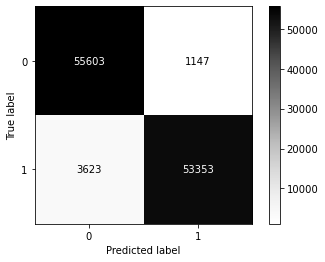

In [25]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Greys")

plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

